<a href="https://colab.research.google.com/github/rko7/Kaggle_ML-Project/blob/main/Machine_Learning_Project_Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
# load the dataset to pandas Dataframe
df = pd.read_csv("/content/insurance.csv")

In [3]:
# Printing the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
df.shape

(1338, 7)

In [5]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# number of missing values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features:
- Sex
- Smoker
- Region

Data Analysis

In [7]:
# Statistical Measures of the Dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


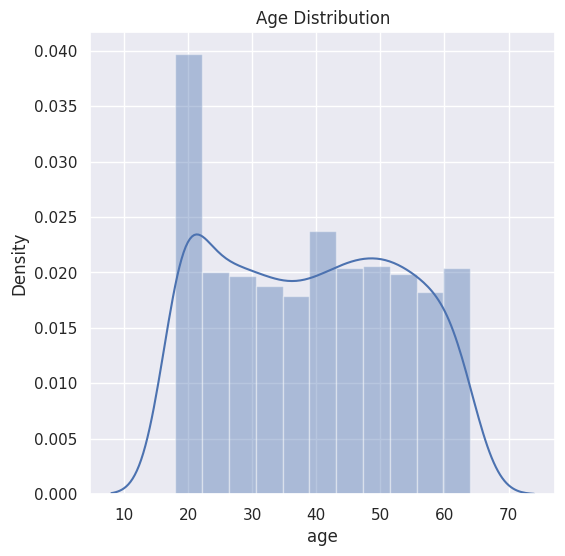

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

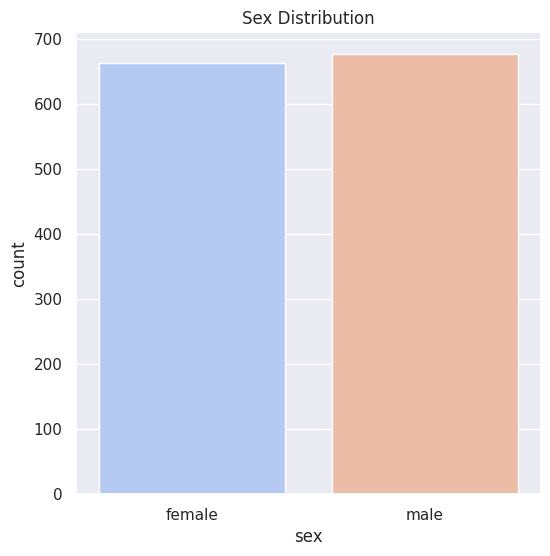

In [9]:
# Gender column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'sex', palette='coolwarm', data = df)
plt.title('Sex Distribution')
plt.show()

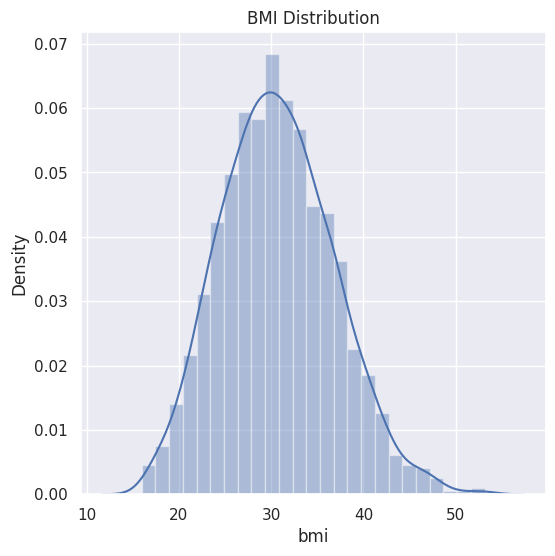

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()


Normal BMI Range is between 18.5 to 24.9

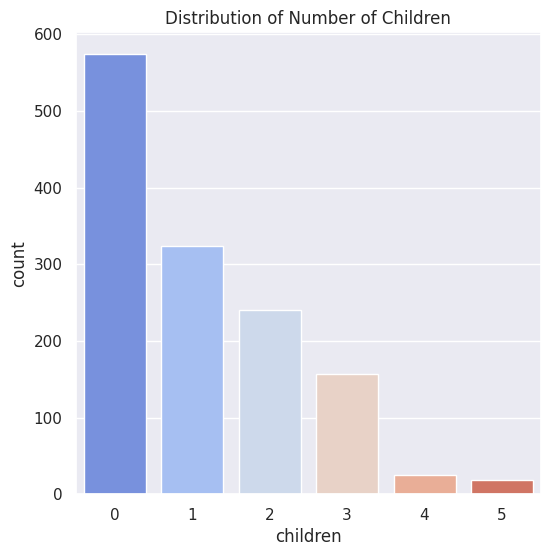

In [11]:
# children column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'children', palette='coolwarm', data = df)
plt.title('Distribution of Number of Children')
plt.show()

In [12]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

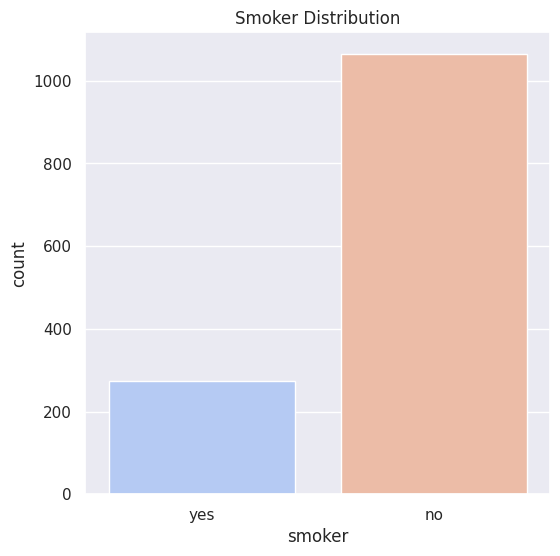

In [13]:
# smoker column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', palette='coolwarm', data = df)
plt.title('Smoker Distribution')
plt.show()

In [14]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

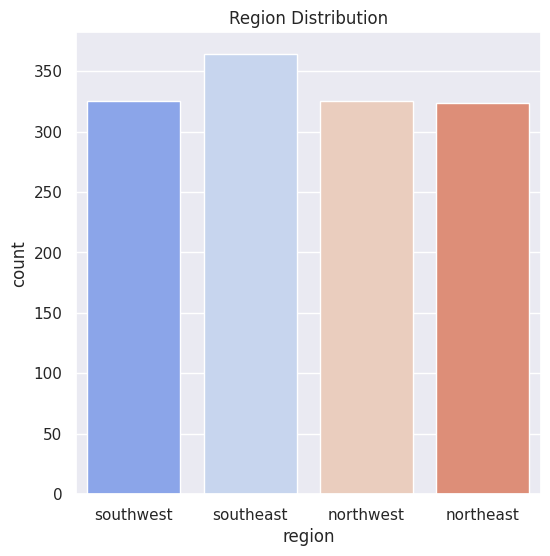

In [15]:
# region column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'region', palette='coolwarm', data = df)
plt.title('Region Distribution')
plt.show()

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

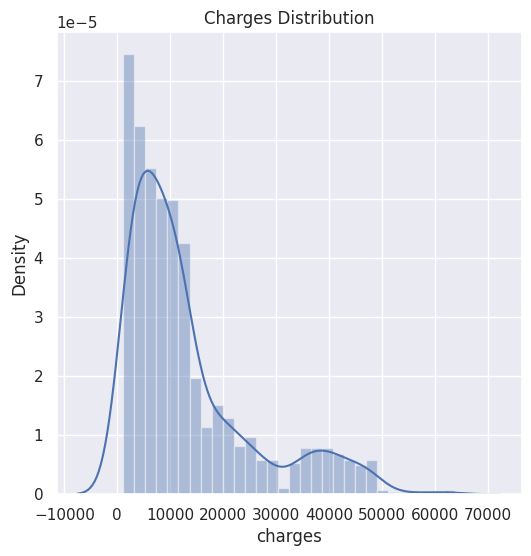

In [17]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

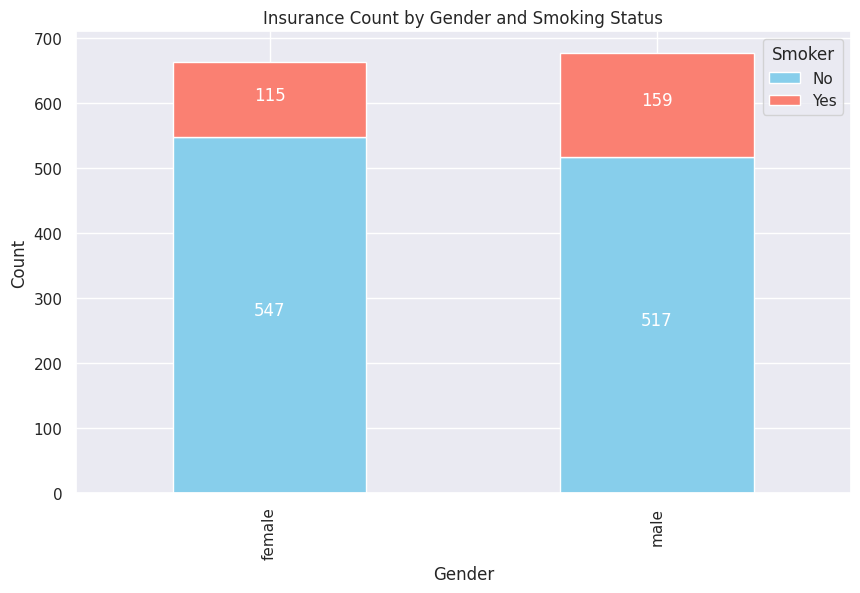

In [18]:
# Distribution by Gender and Smoking Status

# Aggregating data
count_data = df.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

# Plot the stacked bar chart
count_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

# Adding bar labels
for n, x in enumerate([*count_data.index.values]):
    for (proportion, count) in zip(count_data.loc[x], count_data.loc[x].cumsum()):
        plt.text(n, count - (proportion / 2), f'{int(proportion)}', ha='center', color='white', fontsize=12)
plt.title('Insurance Count by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.show()

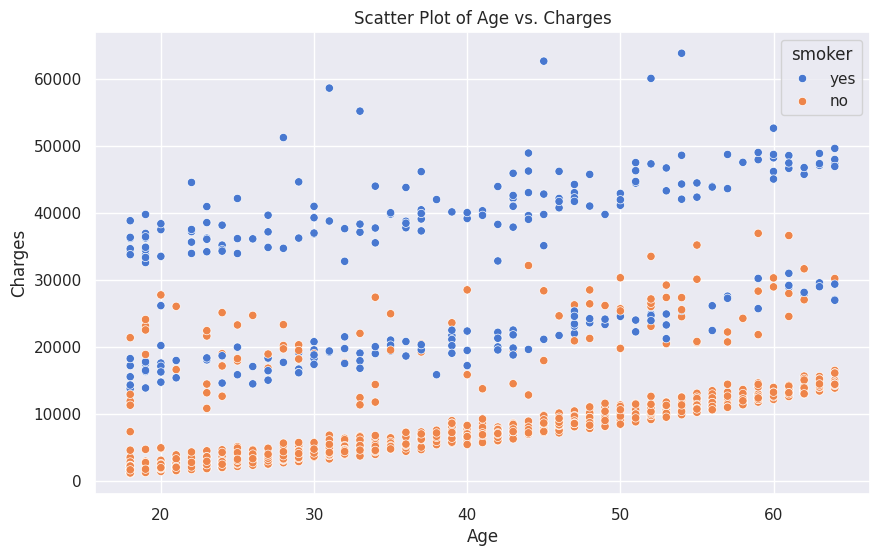

In [19]:
# relationship between Age and Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='muted')
plt.title('Scatter Plot of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

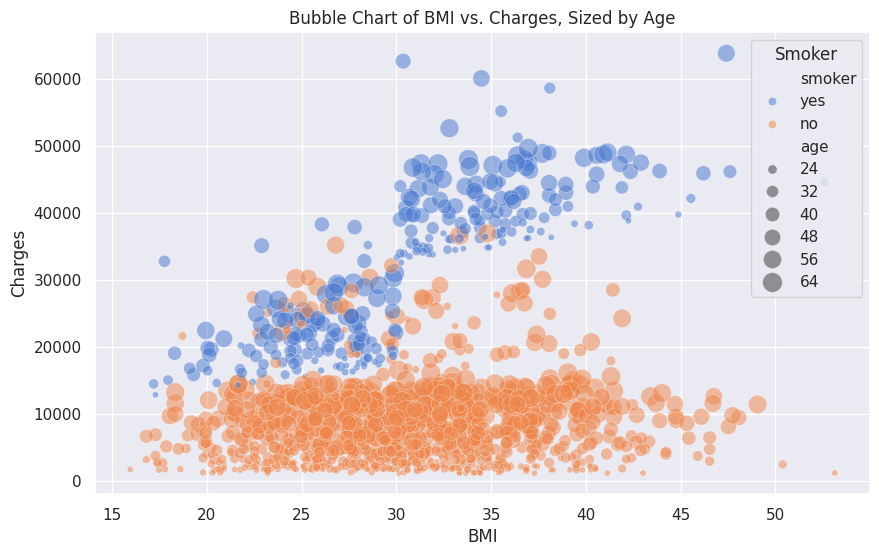

In [20]:
# relationship between BMI, Age, and Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', size='age', hue='smoker', data=df, palette='muted', sizes=(20, 200), alpha=0.5)
plt.title('Bubble Chart of BMI vs. Charges, Sized by Age')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

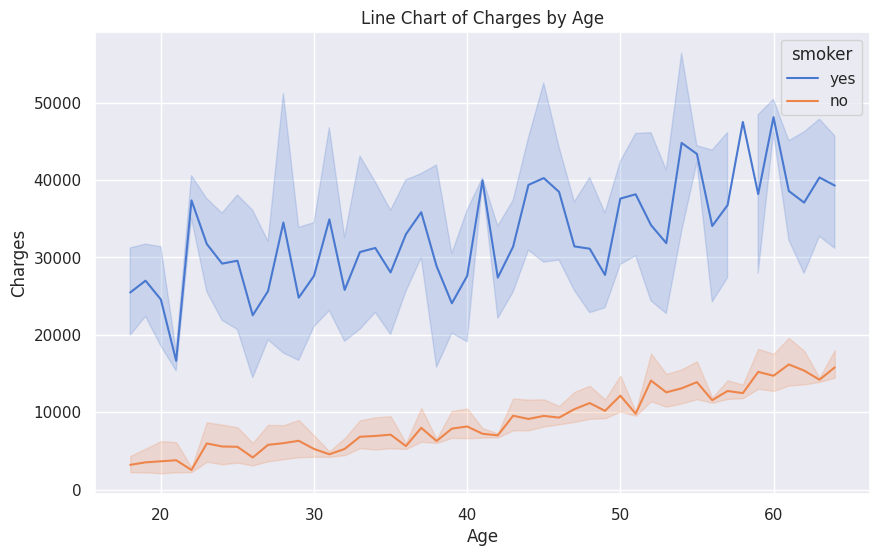

In [21]:
# charges by Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, hue='smoker', palette='muted')
plt.title('Line Chart of Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

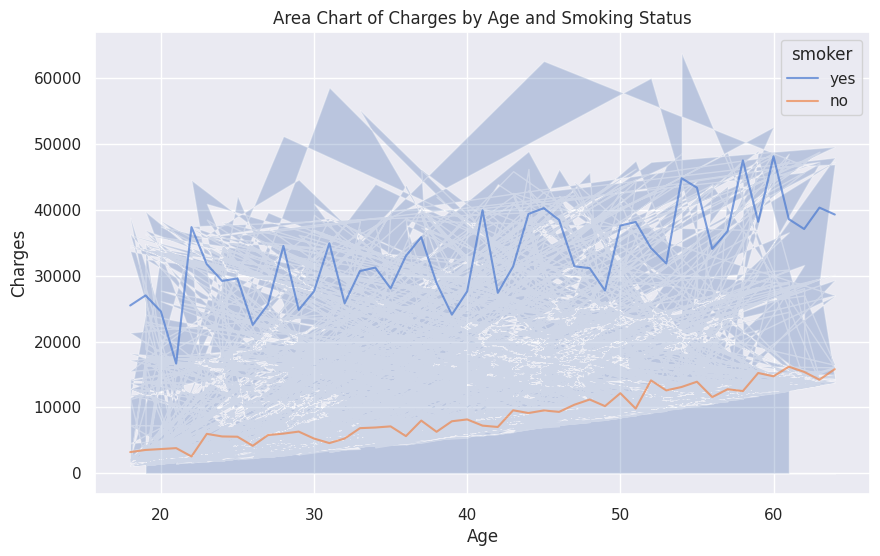

In [22]:
# charges by Age and Smoking Status
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', hue='smoker', data=df, palette='muted', estimator='mean', ci=None, alpha=0.7)
plt.fill_between(df['age'], df['charges'], alpha=0.3)
plt.title('Area Chart of Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [23]:
# check the distribution of categorical data
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [24]:
# label encoding
df.replace({"sex":{'male': 0,'female': 1},"smoker":{'yes': 0,'no': 1},"region":{'southeast': 0,'southwest': 1,'northeast': 2,'northwest': 3}}, inplace = True)

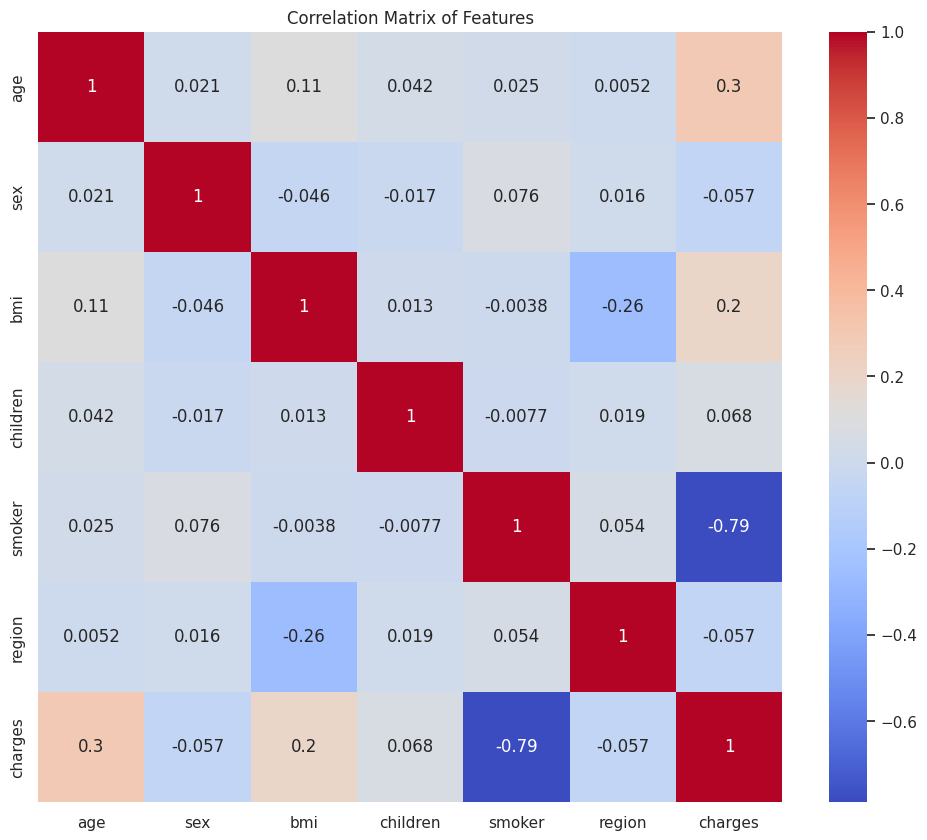

In [25]:
# correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

Split the features and target

In [26]:
X = df.drop(columns = "charges", axis=1 )
Y = df['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Split the data into Training DAta & Testing Data


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [28]:
# load the linear regression model
lin_reg_model = LinearRegression()

In [29]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [30]:
# prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [31]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Value : ", r2_train)

R Squared Value :  0.751505643411174


In [32]:
# prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [33]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Value : ", r2_test)

R Squared Value :  0.7447273869684076


Building a Predictive System

In [34]:
input_data = (27, 1, 24.57, 0, 1, 3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

print(f'The insurance cost is USD ${prediction[0]:.2f}')

[3004.27111577]
The insurance cost is USD $3004.27
